# Assignment 6 - Targeted Marketing Campaign
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
1. Read in, parse, and pre-process the data
2. Perform a brief exploratory analysis
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model

In [29]:
# Load necessary libraries
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

from imblearn.over_sampling import SMOTE 

from IPython.display import Image
from subprocess import check_call

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

pd.options.display.max_rows = None

# Read and perform data cleaning

In [72]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Bank%20Data.csv'
df = pd.read_csv(filename)

# Convert categorical columns to numeric columns
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [73]:
# View first five rows of the data frame
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,30,0,0,155,0,1,0,0,0,0,1
1,22,1,3,385,1,3,1,0,1,1,0
2,33,0,0,136,1,0,1,1,1,0,0
3,5,0,3,203,1,3,0,0,1,0,0
4,39,0,1,557,1,0,0,1,0,0,0


In [74]:
# Print DataFrame's size
print(df.shape)
# Print DataFrame's data types
# Note: we can see that all columns were numeric columns now (after did the onehot-encoded), except the target columns
print(df.dtypes)

(600, 11)
age            int64
sex            int32
region         int32
income         int64
married        int32
children       int64
car            int32
save_act       int32
current_act    int32
mortgage       int32
pep            int32
dtype: object


In [101]:
# Separate the independent variables (AKA Features) from the dependent labels (AKA Target)
targetOutcome = pd.DataFrame(df,columns=['pep'])
allFeatures = pd.DataFrame(df,columns=df.columns.difference(['pep']))

# Handling class imbalance using SMOTE method
sm = SMOTE(random_state=0)
allInputs_resample, targetOutcome_resample = sm.fit_sample(allFeatures, targetOutcome.values.ravel())

# Split the Training (90%) and Testing Data (10%)
X, XX, Y, YY = train_test_split(allInputs_resample, targetOutcome_resample, test_size = 0.1, random_state = 0)

# Tuning the Depth of a Tree

## 1. Dicision Tree (Gini Coefficient)

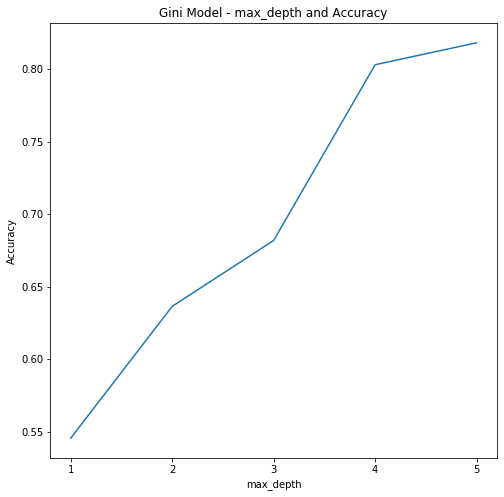

In [76]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:

# List of values to try for max_depth:
accuracy_gini = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X, Y)    
    score = clf.score(XX, YY)
    accuracy_gini.append(score)
    
# Plot max_depth and accuracy for Gini model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Gini Model - max_depth and Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(max_depth_range, accuracy_gini)
plt.show()

## 2. Random Forest

In [77]:
# Hyperparameters
nTrees = 100 # trim number of trees
min_node_size = 5 # minimum on those size
verbose = 0

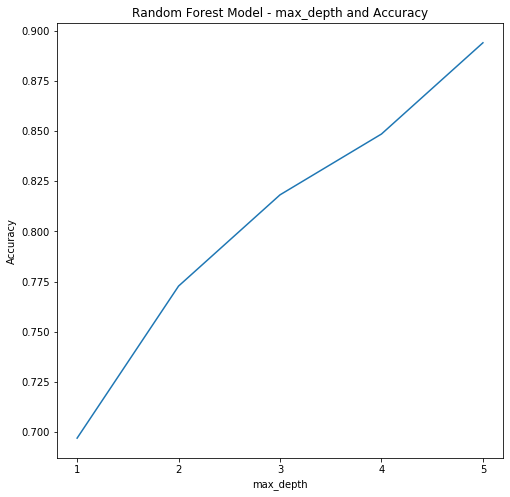

In [78]:
accuracy_random_forest = []
for depth in max_depth_range:
    clf = RandomForestClassifier(n_estimators=nTrees, max_depth=depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
    clf.fit(X, Y)    
    score = clf.score(XX, YY)
    accuracy_random_forest.append(score)
    
# Plot max_depth and accuracy for Rendom Forest model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Model - max_depth and Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(max_depth_range, accuracy_random_forest)
plt.show()

# Create Decision Trees Model

## 1. Dicision Tree (Gini Coefficient)

In [79]:
# Use information gain (default)
# Based on the tuning the depth of a tree for Gini, the best max_depth is 4
model_gini = DecisionTreeClassifier(max_depth = 4).fit(X, Y)
y_gini_predict = model_gini.predict(XX)

In [80]:
# Based on the tuning the depth of a tree for Random Forest, the best max_depth is 5
model_random_forest = RandomForestClassifier(n_estimators=nTrees, max_depth=5, random_state=0, verbose=verbose, min_samples_leaf=min_node_size).fit(X, Y)
y_random_forest_predict = model_random_forest.predict(XX)

# Visualize Decision Trees Model

## 1. Dicision Tree (Gini Coefficient)

In [81]:
# Confusion Metrix
pd.DataFrame(
    metrics.confusion_matrix(YY, y_gini_predict),
    columns=['Predicted PEP-YES', 'Predicted PEP-NO'],
    index=['True PEP-YES', 'True PEP-NO']
)

,Predicted PEP-YES,Predicted PEP-NO
True PEP-YES,24,5
True PEP-NO,8,29


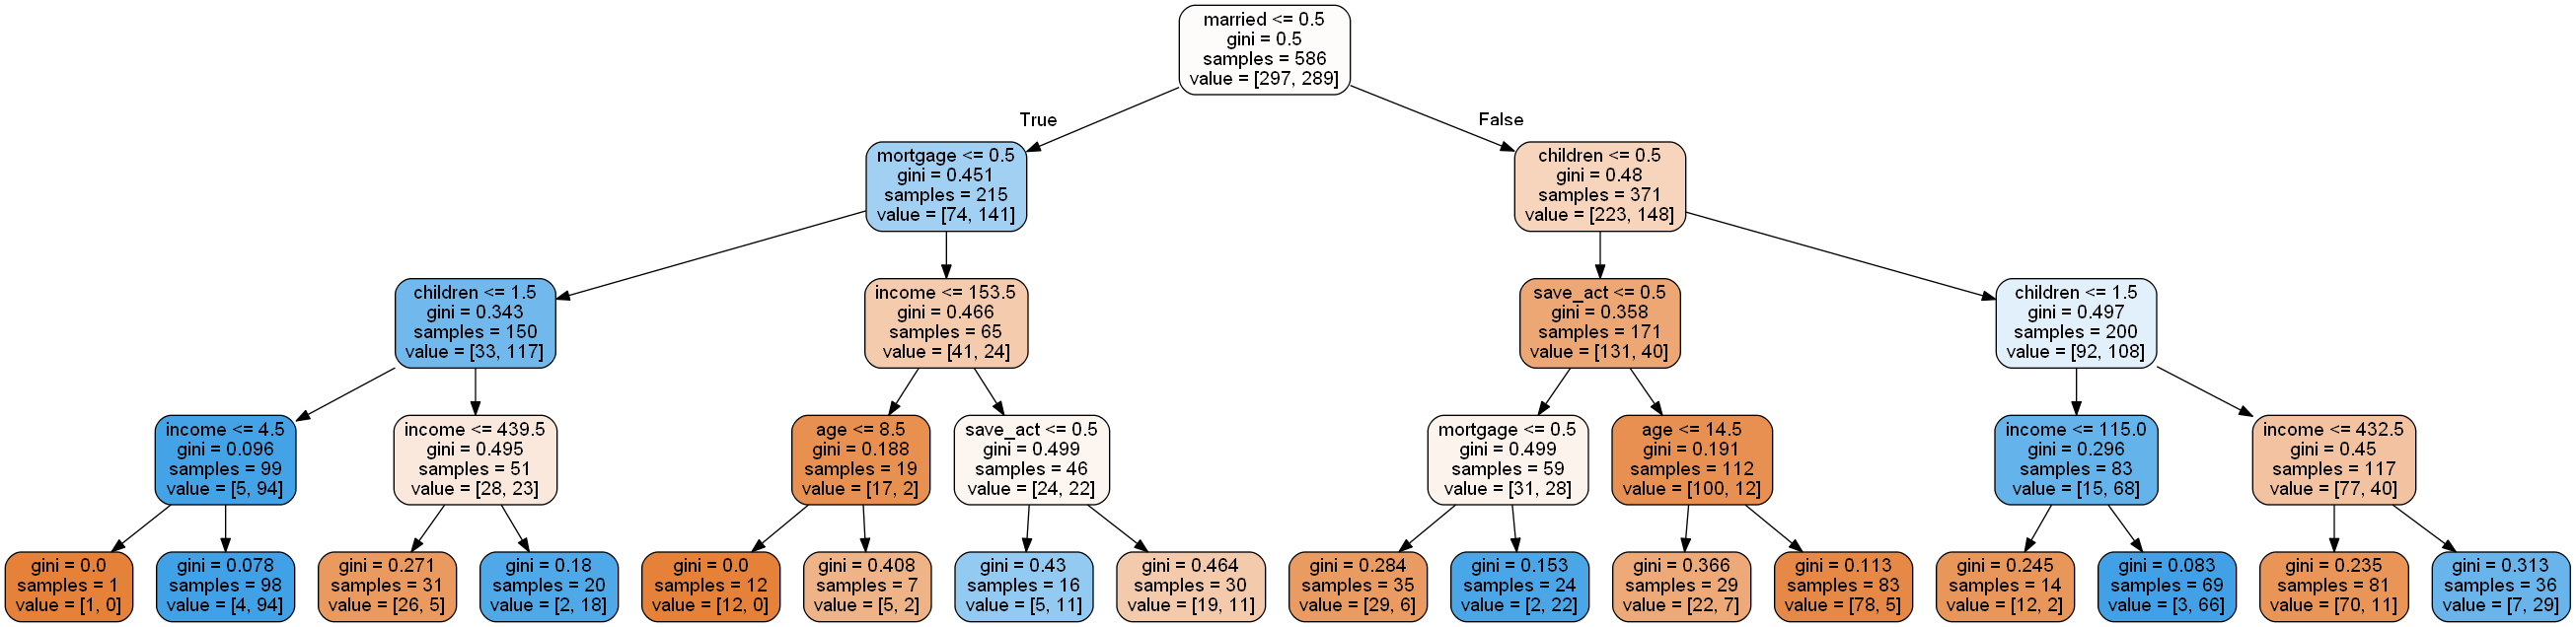

In [82]:
gini_dotfile = open("gini_dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = gini_dotfile, filled=True, rounded=True, feature_names = df.columns.difference(['pep']))
gini_dotfile.close()

# Convert the dot file to a png
check_call(['dot','-Tpng','gini_dtree.dot','-o','gini_dtree.png'])

# show the png
Image(filename='gini_dtree.png', width=750, height=750)

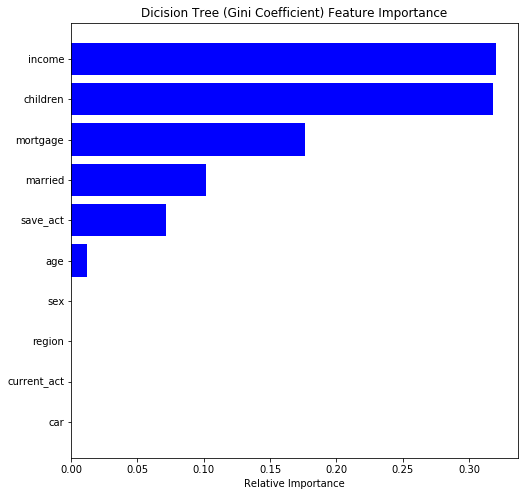

In [97]:
# Calculate feature importances
gini_importances = model_gini.feature_importances_

# Sort feature importances in descending order
gini_indices = np.argsort(gini_importances)

# Rearrange feature names so they match the sorted feature importances
gini_names = [df.columns[i] for i in gini_indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Dicision Tree (Gini Coefficient) Feature Importance")

# Add bars
plt.barh(range(len(gini_indices)), gini_importances[gini_indices], color='b', align='center')

# Add feature names as x-axis labels
plt.yticks(range(len(gini_indices)), [df.columns.difference(['pep'])[i] for i in gini_indices])
plt.xlabel('Relative Importance')

# Show plot
plt.show()

## 2. Random Forest

In [84]:
# Confusion Metrix
pd.DataFrame(
    metrics.confusion_matrix(YY, y_random_forest_predict),
    columns=['Predicted PEP-YES', 'Predicted PEP-NO'],
    index=['True PEP-YES', 'True PEP-NO']
)

,Predicted PEP-YES,Predicted PEP-NO
True PEP-YES,27,2
True PEP-NO,5,32


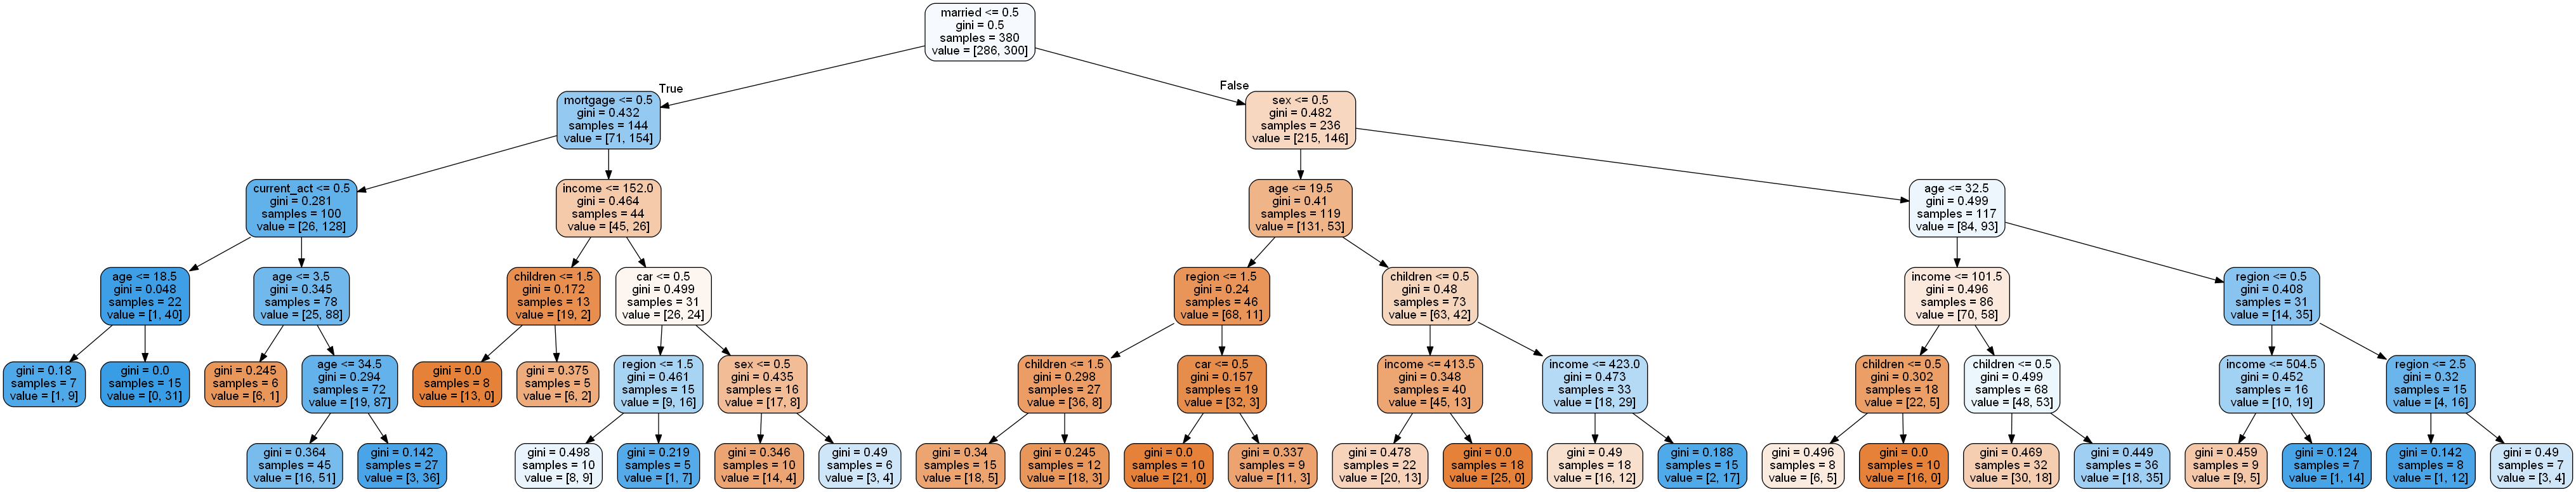

In [85]:
# Get the final Random Forest Decision Tree
last_index = len(model_random_forest.estimators_) - 1

random_forest_dotfile = open("random_forest_dtree.dot", 'w')
tree.export_graphviz(model_random_forest.estimators_[last_index], out_file = random_forest_dotfile, filled=True, rounded=True, feature_names = df.columns.difference(['pep']))
random_forest_dotfile.close()

# Convert the dot file to a png
check_call(['dot','-Tpng','random_forest_dtree.dot','-o','random_forest_dtree.png'])

# show the png
Image(filename='random_forest_dtree.png', width=750, height=750)

In [95]:
random_forest_importances

array([0.12656676, 0.011155  , 0.31038891, 0.00710027, 0.2542109 ,
       0.13271365, 0.06199453, 0.03176117, 0.04791754, 0.01619127])

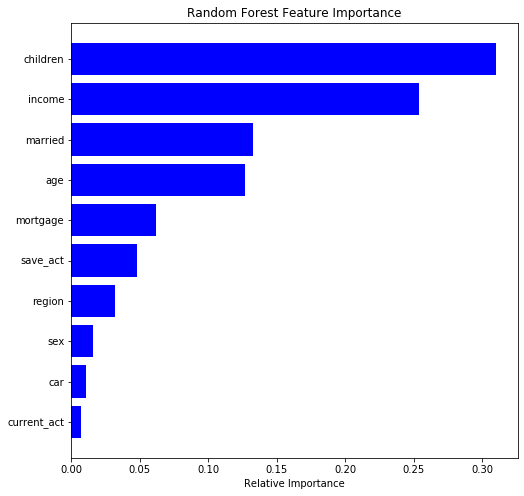

In [96]:
# Calculate feature importances
random_forest_importances = model_random_forest.feature_importances_

# Sort feature importances in descending order
random_forest_indices = np.argsort(random_forest_importances)

# Rearrange feature names so they match the sorted feature importances
random_forest_names = [df.columns[i] for i in random_forest_indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Random Forest Feature Importance")

# Add bars
plt.barh(range(len(random_forest_indices)), random_forest_importances[random_forest_indices], color='b', align='center')

# Add feature names as x-axis labels
plt.yticks(range(len(random_forest_indices)), [df.columns.difference(['pep'])[i] for i in random_forest_indices])
plt.xlabel('Relative Importance')

# Show plot
plt.show()

# AUC, Precision and Recall

## 1. Dicision Tree (Gini Coefficient)

Gini Accuracy is : 80.3030303030303%
Gini Precision is : 85.29411764705883%
Gini Recall is : 78.37837837837837%


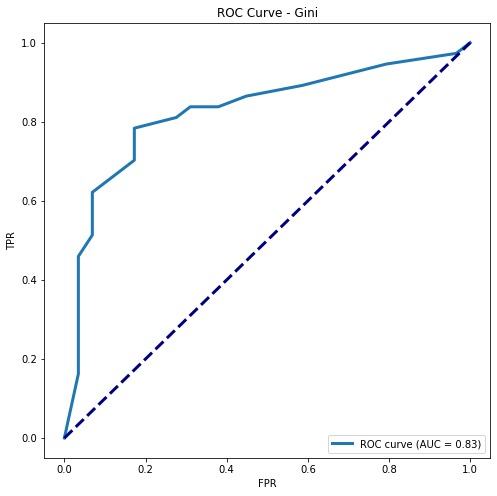

In [98]:
gini_bothProbabilities = model_gini.predict_proba(XX)
gini_probabilities = gini_bothProbabilities[:,1]

# pos_label- the label of the positive class
print("Gini Accuracy is : {}%".format(metrics.accuracy_score(YY, y_gini_predict)*100))
print("Gini Precision is : {}%".format(metrics.precision_score(YY, y_gini_predict)*100))
print("Gini Recall is : {}%".format(metrics.recall_score(YY, y_gini_predict)*100))

# False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY, gini_probabilities) 
AUC = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve - Gini')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

## 2. Random Forest

Random Forest Accuracy is : 89.39393939393939%
Random Forest Precision is : 94.11764705882352%
Random Forest Recall is : 86.48648648648648%


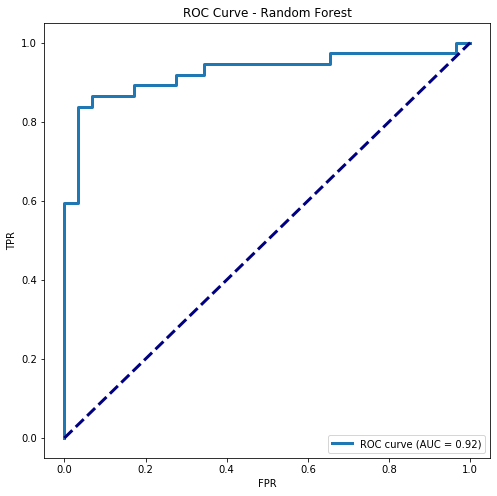

In [99]:
random_forest_bothProbabilities = model_random_forest.predict_proba(XX)
random_forest_probabilities = random_forest_bothProbabilities[:,1]

# pos_label- the label of the positive class
print("Random Forest Accuracy is : {}%".format(metrics.accuracy_score(YY, y_random_forest_predict)*100))
print("Random Forest Precision is : {}%".format(metrics.precision_score(YY, y_random_forest_predict)*100))
print("Random Forest Recall is : {}%".format(metrics.recall_score(YY, y_random_forest_predict)*100))

# False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY, random_forest_probabilities) 
AUC = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve - Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

***
**Summary:**
1. **Random Forest** perform much better than **Decision Tree (Gini Coefficient)** method.
2. **Best hyperparameter:** 
    - max_depth for **Gini** is 4
    - max_depth for **Random Forest** is 5
3. The most top 5 important features for both decision trees models are different:
    - <font color=blue>**Order from the most important to the least important**</font>
    - **Gini:** income, children, mortgage, married, save_act and age
    - **Random Forest** children, income, married, age, mortgage and save_act
4. **AUC:**
    - **Gini** is **0.83**
    - **Random Forest** is **0.92**
5. **Accuracy:**
    - **Gini** is : **80.30 %**
    - **Random Forest** is **97.73 %**
6. **Precision:**
    - **Gini** is : **85.29 %**
    - **Random Forest** is **94.12 %**
7. **Recall:**
    - **Gini** is : **78.38 %**
    - **Random Forest** is **86.49 %**
***